# Compare representations with UMAPs

In [40]:
import polars as pl 
import pandas as pd 
import scanpy as sc
import umap
import numpy as np 
import anndata
import matplotlib.pyplot as plt

In [1]:
outputs = "../1_snakemake/outputs"

## Make overall UMAPs

In [21]:
# dino
df = pl.read_parquet(f"{outputs}/dino/mad_featselect/profiles/mad_featselect.parquet").to_pandas()
meta_cols = [i for i in df.columns if "Metadata" in i]
feat_cols = [i for i in df.columns if "Metadata" not in i]

dino = anndata.AnnData(X=df[feat_cols].values) 
dino.obs = df[meta_cols].copy()

In [20]:
# cellprofiler
df = pl.read_parquet(f"{outputs}/cellprofiler/mad_featselect/profiles/mad_featselect.parquet").to_pandas()
meta_cols = [i for i in df.columns if "Metadata" in i]
feat_cols = [i for i in df.columns if "Metadata" not in i]

cellprofiler = anndata.AnnData(X=df[feat_cols].values) 
cellprofiler.obs = df[meta_cols].copy()

In [18]:
# cpcnn
df = pl.read_parquet(f"{outputs}/cpcnn/mad_featselect/profiles/mad_featselect.parquet").to_pandas()
meta_cols = [i for i in df.columns if "Metadata" in i]
feat_cols = [i for i in df.columns if "Metadata" not in i]

cpcnn = anndata.AnnData(X=df[feat_cols].values) 
cpcnn.obs = df[meta_cols].copy()

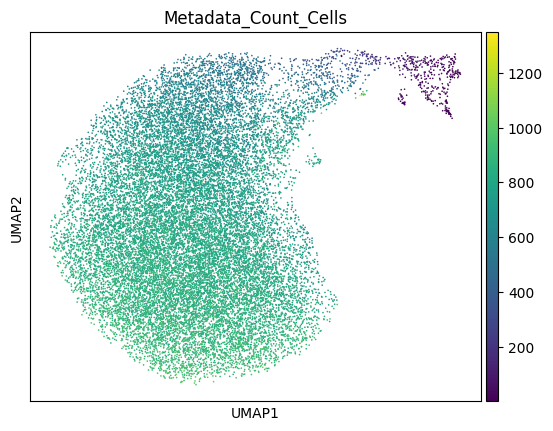

In [22]:
sc.pp.scale(dino)
sc.pp.pca(dino)
sc.pp.neighbors(dino)
sc.tl.umap(dino)
sc.pl.umap(dino, color=["Metadata_Count_Cells"])

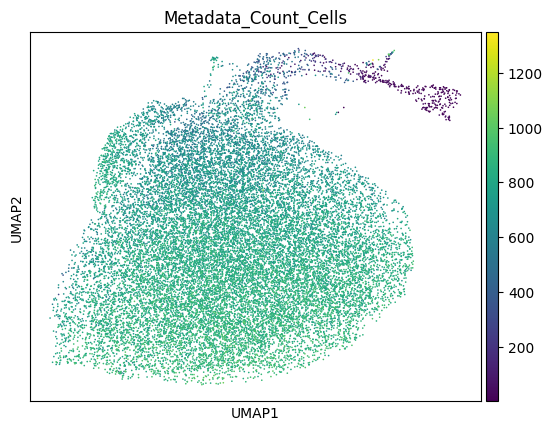

In [19]:
sc.pp.scale(cpcnn)
sc.pp.pca(cpcnn)
sc.pp.neighbors(cpcnn)
sc.tl.umap(cpcnn)
sc.pl.umap(cpcnn, color=["Metadata_Count_Cells"])

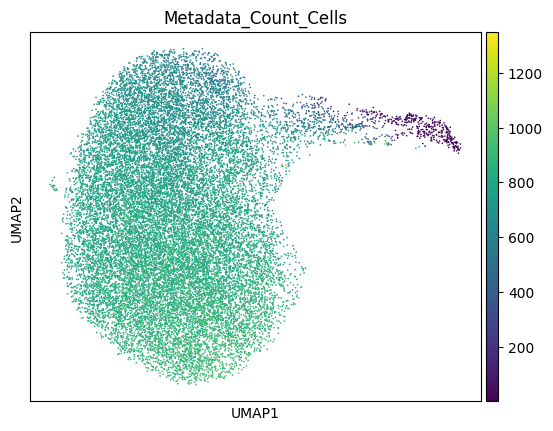

In [17]:
sc.pp.scale(cellprofiler)
sc.pp.pca(cellprofiler)
sc.pp.neighbors(cellprofiler)
sc.tl.umap(cellprofiler)
sc.pl.umap(cellprofiler, color=["Metadata_Count_Cells"])

## Investigate CellProfiler feature subsets

The CellProfiler embeddings look quite different; we want to know whether this is driven by a subset of features.

In [25]:
feat_names = cellprofiler.var_names

In [31]:
df = pl.read_parquet(f"{outputs}/cellprofiler/mad_featselect/profiles/mad_featselect.parquet").to_pandas()
meta_cols = [i for i in df.columns if "Metadata" in i]
feat_cols = [i for i in df.columns if "Metadata" not in i]
feat_cols = [i for i in feat_cols if "Image" not in i]

cp2 = anndata.AnnData(X=df[feat_cols].values) 
cp2.obs = df[meta_cols].copy()

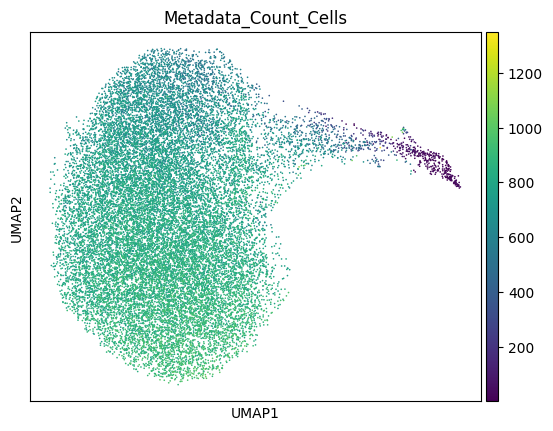

In [32]:
df_name = cp2
sc.pp.scale(df_name)
sc.pp.pca(df_name)
sc.pp.neighbors(df_name)
sc.tl.umap(df_name)
sc.pl.umap(df_name, color=["Metadata_Count_Cells"])

## CellProfiler category UMAPs

In [47]:
categories = [
    "Cells_AGP", "Cells_DNA", "Cells_Mito", "Cells_RNA", "Cells_ER", "Cells_AreaShape",
    "Nuclei_AGP", "Nuclei_DNA", "Nuclei_Mito", "Nuclei_RNA", "Nuclei_ER", "Nuclei_AreaShape",
    "Cytoplasm_AGP", "Cytoplasm_DNA", "Cytoplasm_Mito", "Cytoplasm_RNA", "Cytoplasm_ER", "Cytoplasm_AreaShape"
]

df = pl.read_parquet(f"{outputs}/cellprofiler/mad_featselect/profiles/mad_featselect.parquet").to_pandas()
meta_cols = [i for i in df.columns if "Metadata" in i]
feat_cols = [i for i in df.columns if "Metadata" not in i]
feat_cols = [i for i in feat_cols if "Image" not in i]

Cells_AGP 34


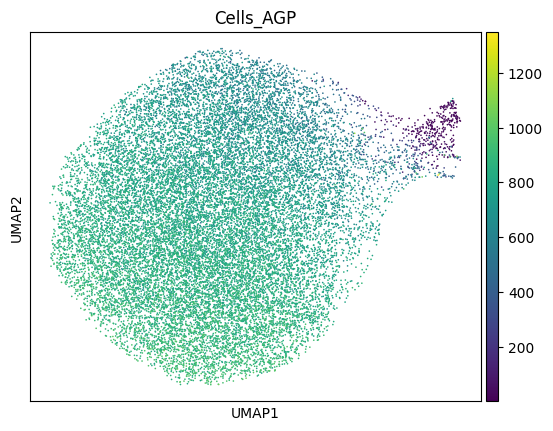

Cells_DNA 44


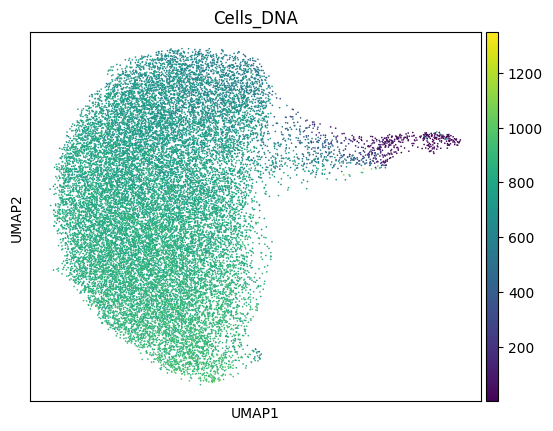

Cells_Mito 38


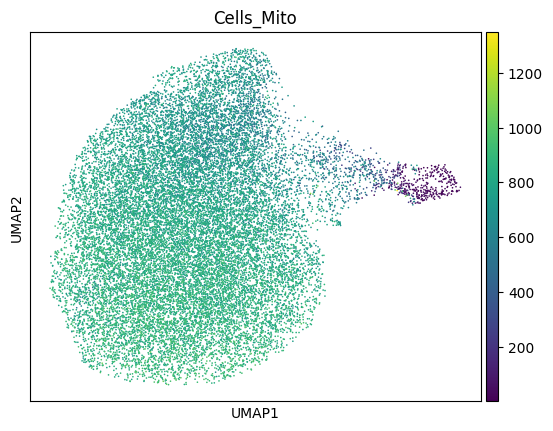

Cells_RNA 30


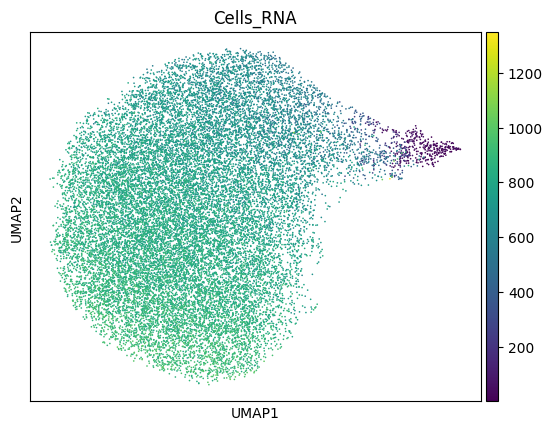

Cells_ER 32


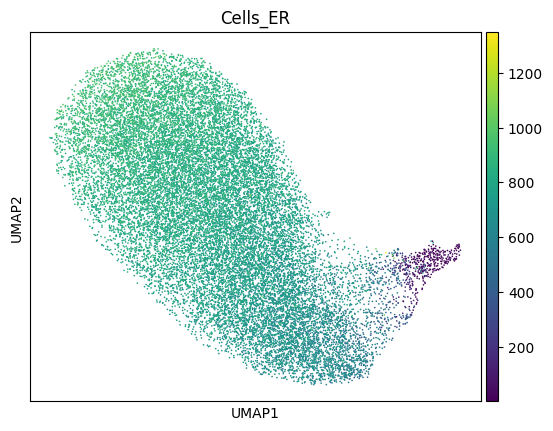

Cells_AreaShape 26


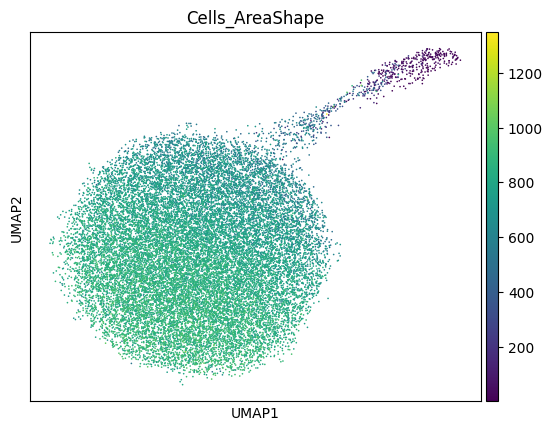

Nuclei_AGP 32


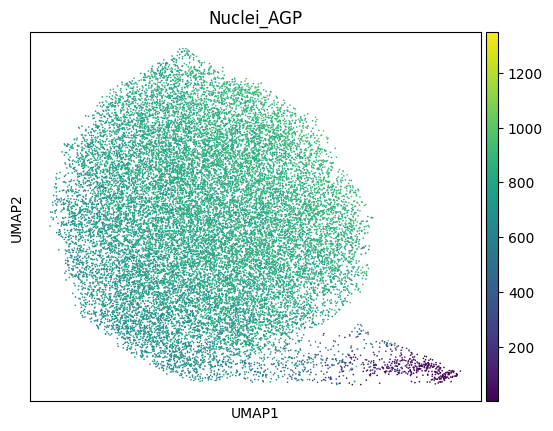

Nuclei_DNA 43


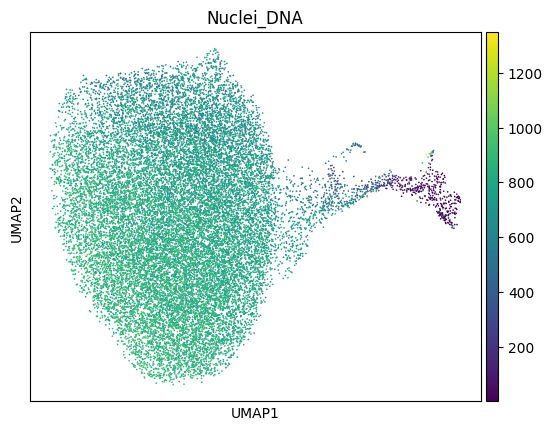

Nuclei_Mito 35


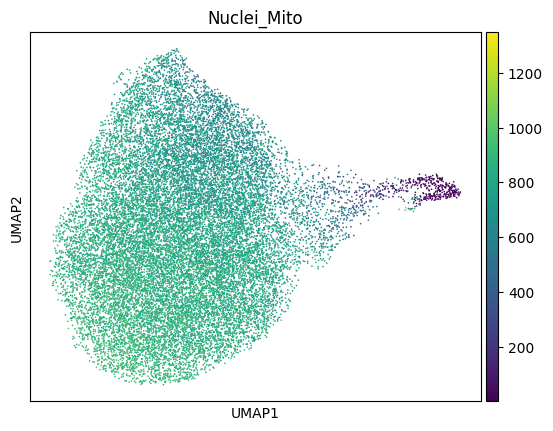

Nuclei_RNA 34


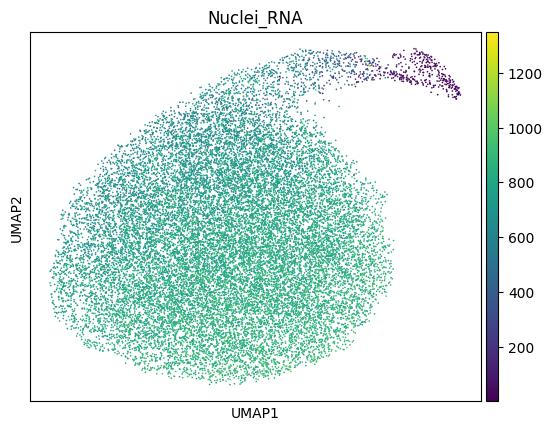

Nuclei_ER 23


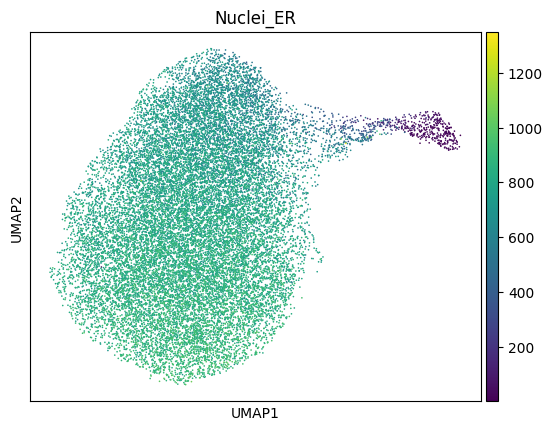

Nuclei_AreaShape 33


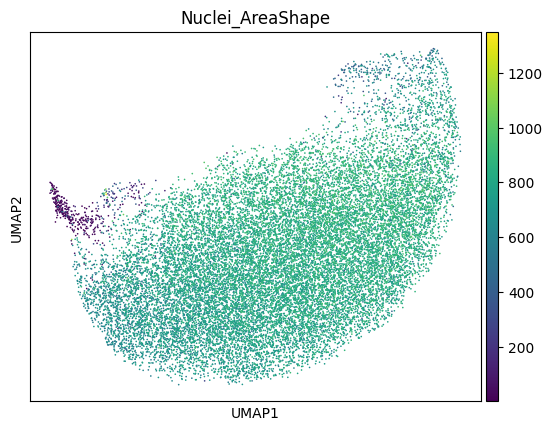

Cytoplasm_AGP 39


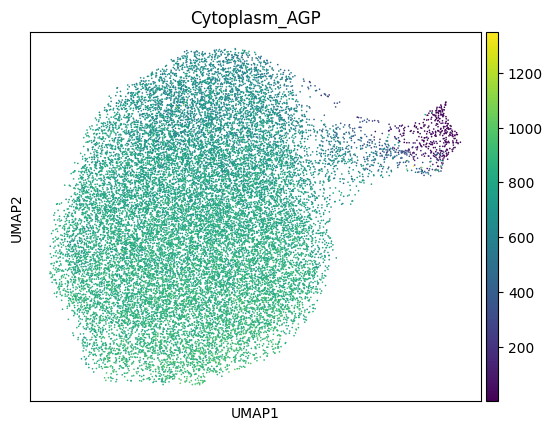

Cytoplasm_DNA 44


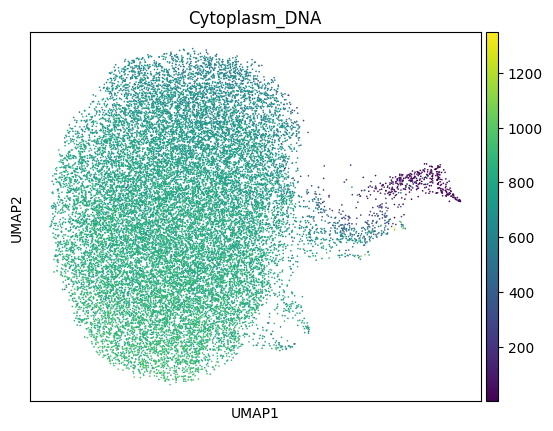

Cytoplasm_Mito 43


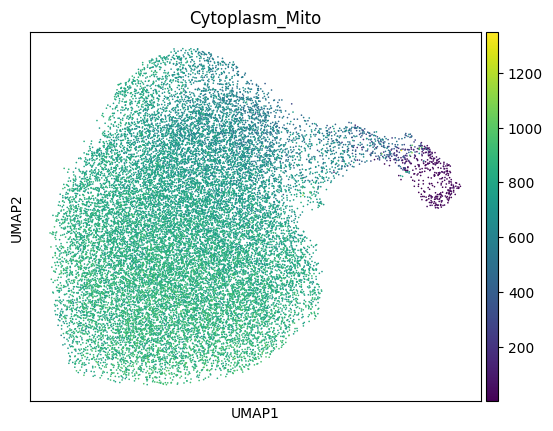

Cytoplasm_RNA 30


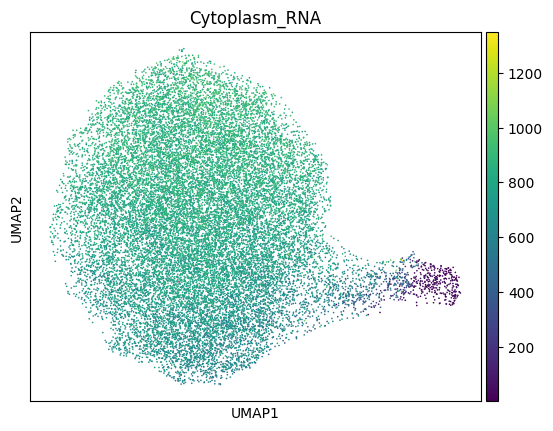

Cytoplasm_ER 40


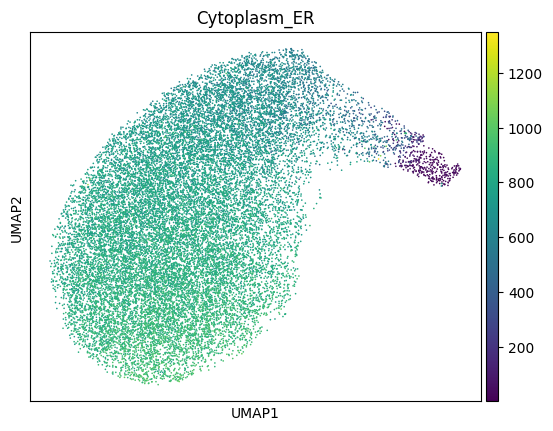

Cytoplasm_AreaShape 27


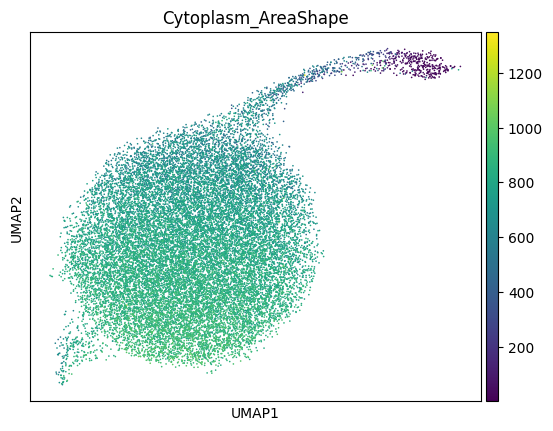

In [48]:
for category in categories:
    compartment, channel = category.split("_")
    
    cat_cols = [i for i in feat_cols if compartment in i]
    cat_cols = [i for i in cat_cols if channel in i]

    print(category, len(cat_cols))
    adata = anndata.AnnData(X=df[cat_cols].values) 
    adata.obs = df[meta_cols].copy()

    df_name = adata
    sc.pp.scale(df_name)
    sc.pp.pca(df_name)
    sc.pp.neighbors(df_name)
    sc.tl.umap(df_name)
    sc.pl.umap(df_name, color=["Metadata_Count_Cells"], title=category)

## DINO category UMAPs

In [45]:
categories = [
    "DNA", "ER", "AGP", "RNA", "Mito", "Brightfield"
]

df = pl.read_parquet(f"{outputs}/cellprofiler/mad_featselect/profiles/mad_featselect.parquet").to_pandas()
meta_cols = [i for i in df.columns if "Metadata" in i]
feat_cols = [i for i in df.columns if "Metadata" not in i]

DNA 157


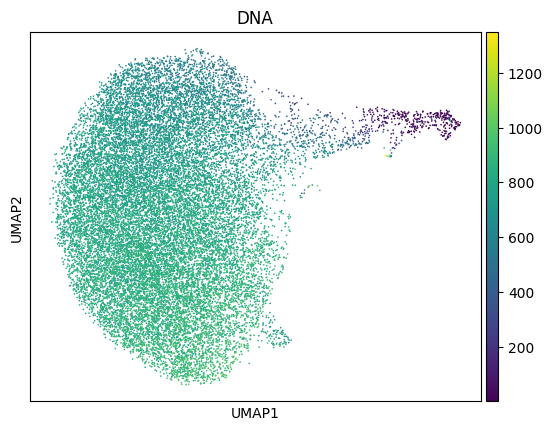

ER 126


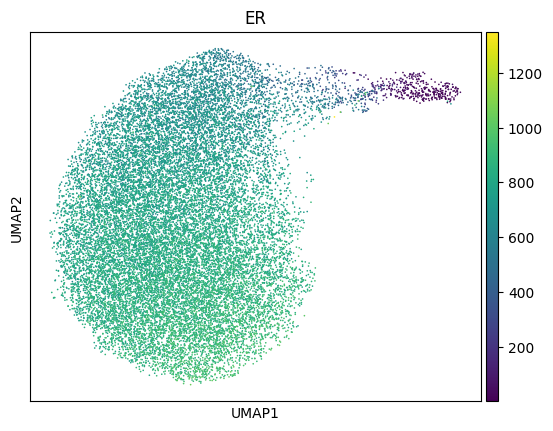

AGP 129


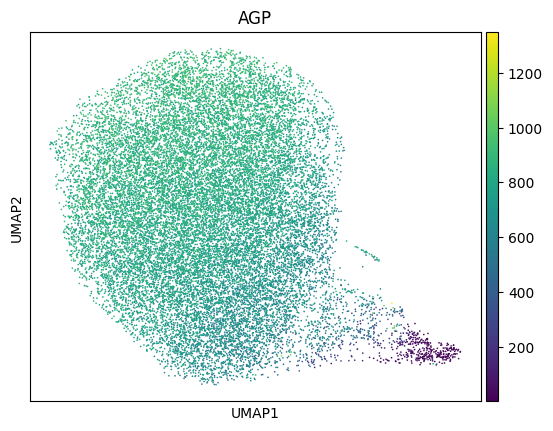

RNA 119


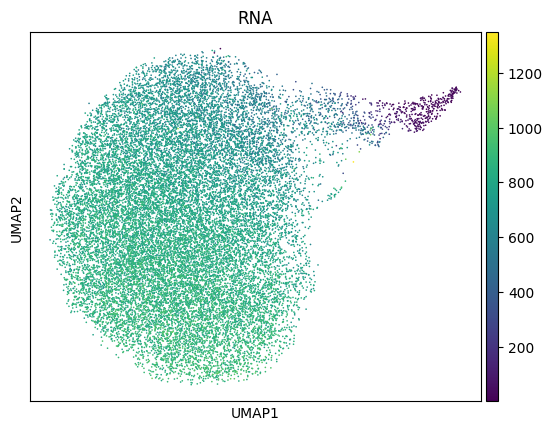

Mito 142


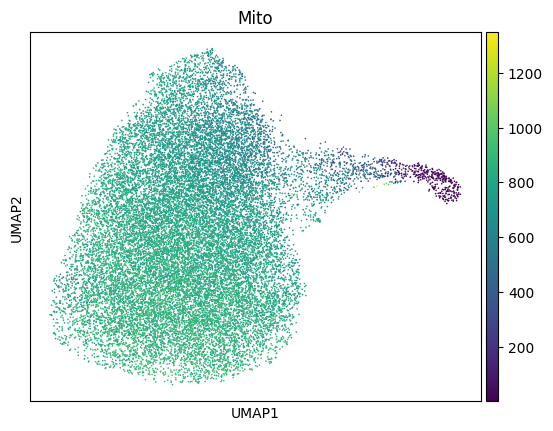

Brightfield 146


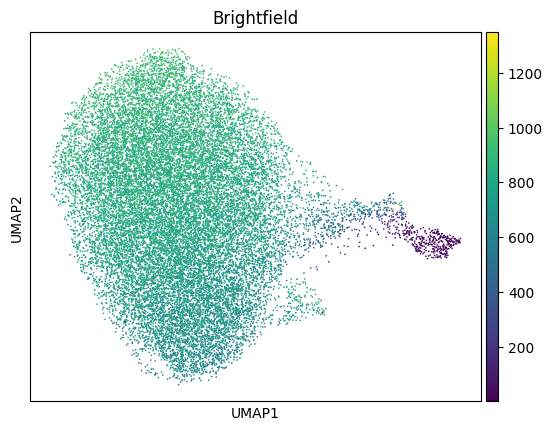

In [46]:
for category in categories:
    
    cat_cols = [i for i in feat_cols if category in i]

    print(category, len(cat_cols))
    adata = anndata.AnnData(X=df[cat_cols].values) 
    adata.obs = df[meta_cols].copy()

    df_name = adata
    sc.pp.scale(df_name)
    sc.pp.pca(df_name)
    sc.pp.neighbors(df_name)
    sc.tl.umap(df_name)
    sc.pl.umap(df_name, color=["Metadata_Count_Cells"], title=category)